# Lista 1

In [10]:
import sys
sys.path.append('..')
from fractions import Fraction

from IPython.display import display, Math
import numpy as np
import pandas as pd
from scipy.special import factorial, comb
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from utils.math import gaussian, loggaussian, uniform_prior, jeffreys_prior, safe_exp, normalize

## Questão 1

Seja $H = \{\text{a pessoa está doente}\}$, $D = \{\text{o teste deu positivo}\}$ e os seus respectivos complementares. Usando essa notação, definimos $FP = \mathbb{P}(D | \overline{H})$ a taxa de falsos positivos, $FN = \mathbb{P}(\overline{D}| H)$ a taxa de falsos negativos, e $p = \mathbb{P}(H)$ a taxa de incidência da doença na população. O teorema de Bayes nos diz que

\begin{align*}
\mathbb{P}(H | D) &= \frac{\mathbb{P}(D| H) \mathbb{P}(H)}{\mathbb{P}(D)}\\
&= \frac{\mathbb{P}(D| H) \mathbb{P}(H)}{\mathbb{P}(D | \overline{H})\mathbb{P}(\overline{H}) + \mathbb{P}(D | H)\mathbb{P}(H)}\\
&= \frac{(1 - FN)p}{FP(1-p) + (1 - FN)p}
\end{align*}

In [34]:
def h_given_d(prior, fp, fn):
    num = prior * (1 - fn)
    denom = fp * (1 - prior) + (1 - fn) * prior
    return num / denom

Calculamos a probabilidade condicional $\mathbb{P}(H | D)$ para o caso em que $FP = 0.5\%$, $FN = 1.4\%$, e a probabilidade de incidência da doença é de $1:10000$:

In [35]:
fp = 0.5e-2
fn = 1.4e-2
prior = 1e-4

prob = h_given_d(prior, fp, fn)
display(Math(r'\mathbb{P}(H | D) = ' + r'{:.2f}\%'.format(100 * prob)))

<IPython.core.display.Math object>

O mesmo para $FP = 2.3 \%$, e probabilidade de incidência de $1:100$:

In [36]:
fp = 2.3e-2
fn = 1.4e-2
prior = 1e-2

prob = h_given_d(p, fp, fn)
display(Math(r'\mathbb{P}(H | D) = ' + r'{:.2f}\%'.format(100 * prob)))

<IPython.core.display.Math object>

Consideremos agora que a pessoa fez dois testes. Definimos as proposições $D_1 = \{\text{o primeiro teste foi positivo}\}$ e $D_2 = \{\text{o segundo teste foi positivo}\}$. Supomos também que o resultado do segundo teste é independente do anterior. Aplicando o Teorema de Bayes,

\begin{align*}
\mathbb{P}(H|D_1,D_2) &= \frac{\mathbb{P}(D_1,D_2 | H) \mathbb{P}(H)}{\mathbb{P}(D_1, D_2)}\\
&= \frac{\mathbb{P}(D_2 | D_1, H) \mathbb{P}(D_1 | H) \mathbb{P}(H)}{\mathbb{P}(D_2 | D_1, H) \mathbb{P}(D_1 | H) \mathbb{P}(H) + \mathbb{P}(D_2 | D_1, \overline{H}) \mathbb{P}(D_1 | \overline{H}) \mathbb{P}(\overline{H})}\\
&= \frac{\mathbb{P}(D_2 | D_1, H) \left (\frac{\mathbb{P}(D_1 | H) \mathbb{P}(H)}{\mathbb{P}(D_1)} \right)}{\mathbb{P}(D_2 | H) \left (\frac{\mathbb{P}(D_1 | H) \mathbb{P}(H)}{\mathbb{P}(D_1)} \right) + \mathbb{P}(D_2 | \overline{H}) \left (\frac{\mathbb{P}(D_1 | \overline{H}) \mathbb{P}(\overline{H})}{\mathbb{P}(D_1)} \right)}\\
&= \frac{\mathbb{P}(D_2| H) \mathbb{P}(H | D_1)}{\mathbb{P}(D_2 | H)\mathbb{P}(H | D_1) + \mathbb{P}(D_2 | \overline{H})\mathbb{P}(\overline{H} | D_1)} 
\end{align*}

Concluímos que a probabilidade $\mathbb{P}(H | D_1)$ calculada no primeiro teste serve como a priori atualizada para o segundo teste na aplicação do teorema de Bayes.

In [40]:
fp1 = 2.3e-2
fn1 = 1.4e-2
fp2 = 0.5e-2
fn2 = 1.4e-2
prior = 1e-4

h_given_d1 = h_given_d(prior, fp1, fn1)
h_given_d2d1 = h_given_d(h_given_d1, fp2, fn2)
display(Math(r'\mathbb{P}(H | D_1, D_2) = ' + r'{:.2f}\%'.format(100 * h_given_d2d1)))

<IPython.core.display.Math object>

## Questão 2

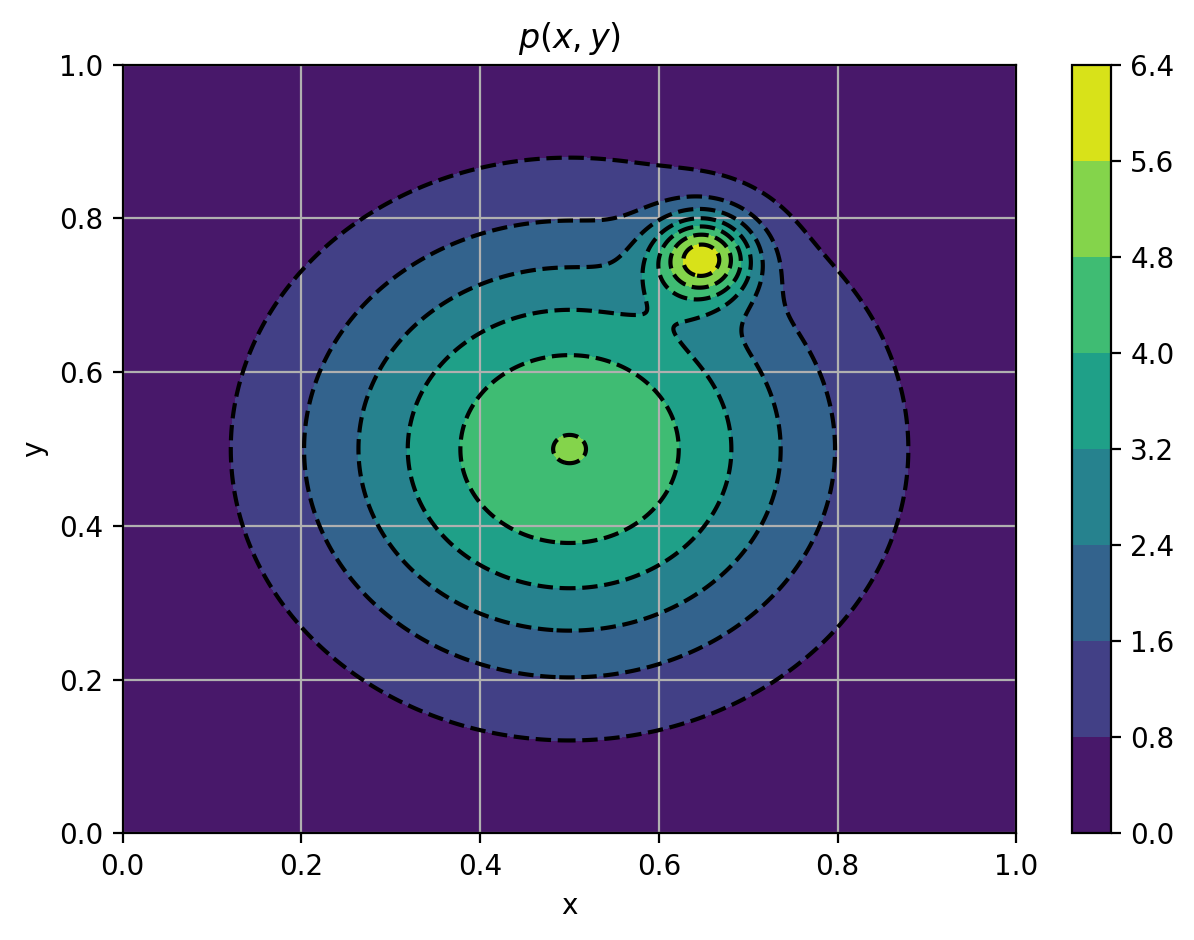

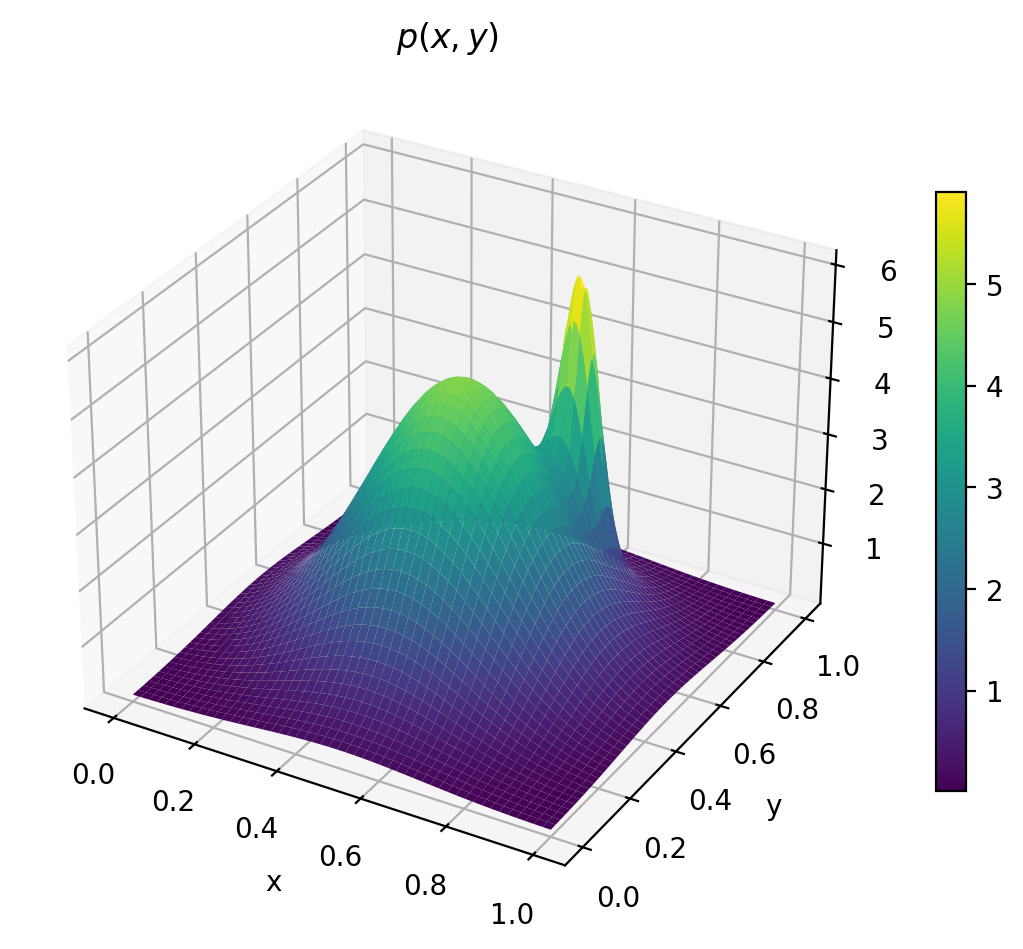

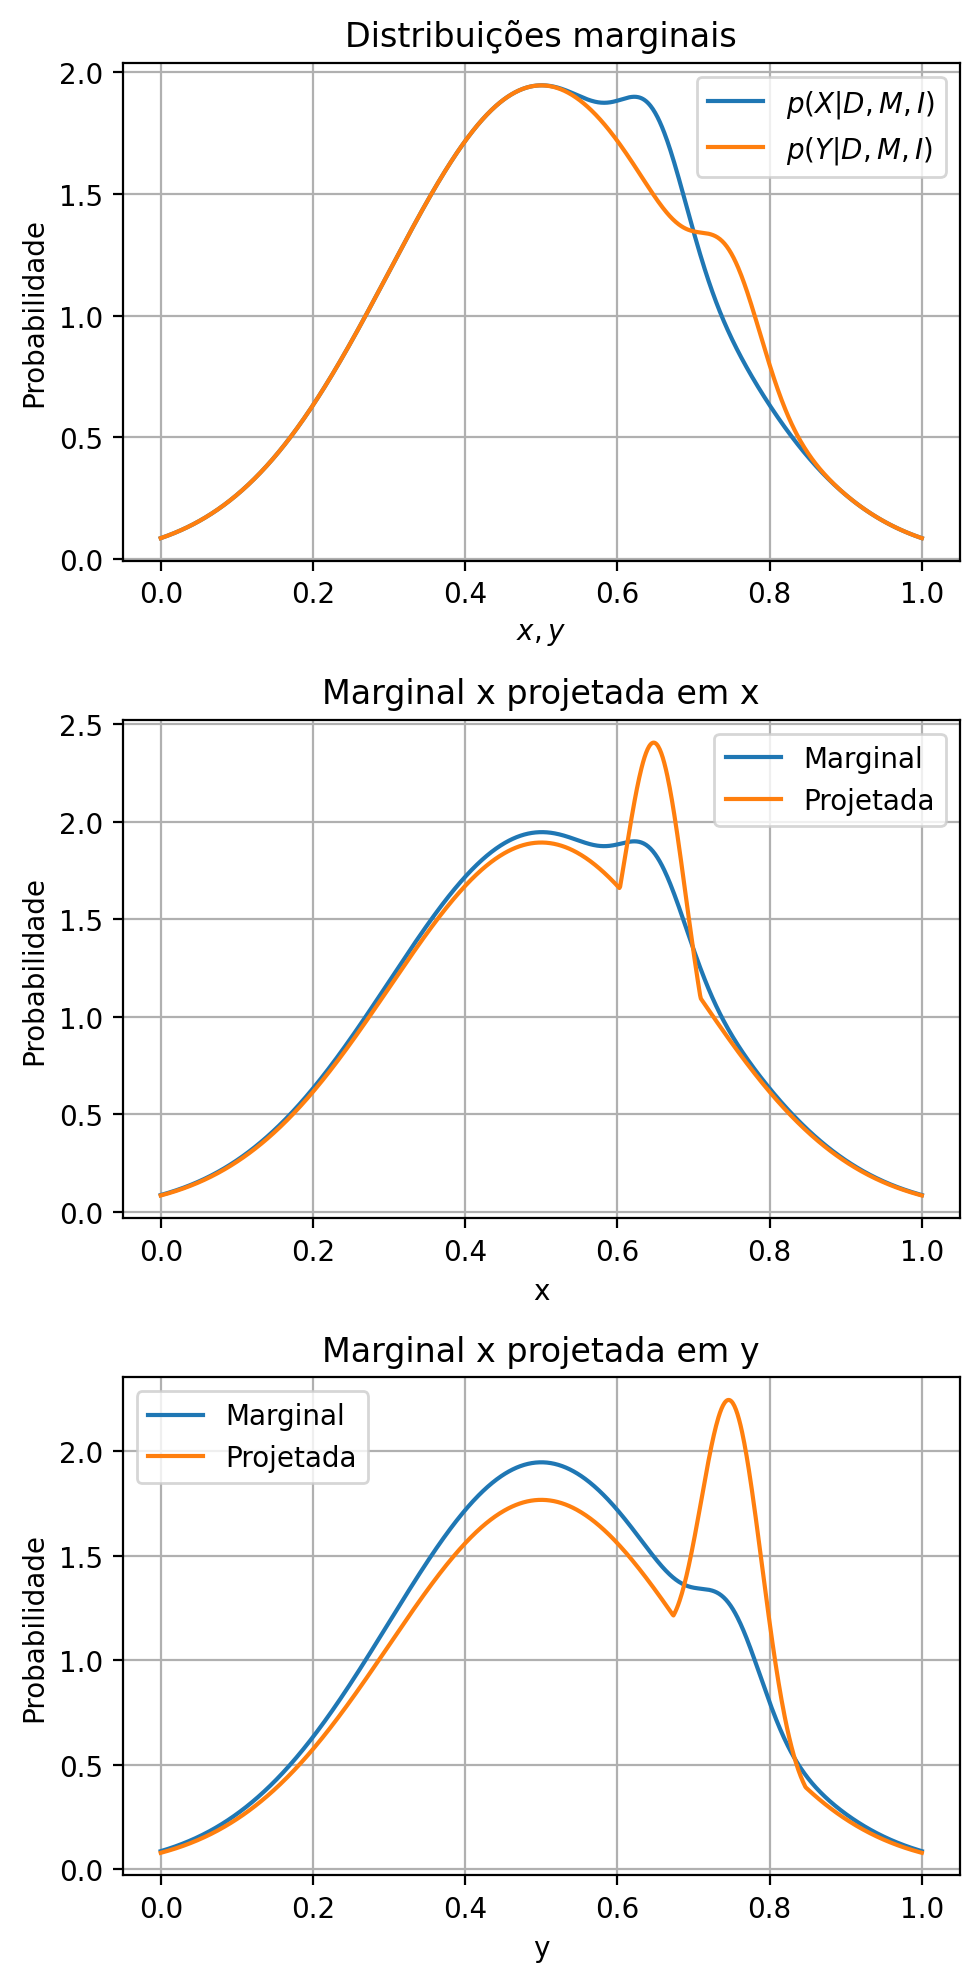

In [2]:
a1 = 4.82033
a2 = 4.43181
x1 = 0.5
y1 = 0.5
x2 = 0.65
y2 = 0.75
sigma1squared = 0.2 ** 2
sigma2squared = 0.04 ** 2

def p(x, y):
    arg1 = (x - x1) ** 2 + (y - y1) ** 2
    arg2 = (x - x2) ** 2 + (y - y2) ** 2
    return a1 * np.exp(-0.5 * arg1 / sigma1squared) + a2 * np.exp(-0.5 * arg2 / sigma2squared)

npoints = 1000
x = np.linspace(0, 1., npoints)
y = np.linspace(0, 1, npoints)
xx, yy = np.meshgrid(x, y)
zz = p(xx, yy)

# Contour plot
fig, ctrax = plt.subplots()
cs = ctrax.contourf(xx, yy, zz, cmap=plt.cm.viridis)
ctrax.contour(cs, colors='k', linestyles='dashed')
fig.colorbar(cs, ax=ctrax)
ctrax.set_title(r'$p(x,y)$')
ctrax.set_xlabel('x')
ctrax.set_ylabel('y')
ctrax.grid()
fig.tight_layout()

# Surface 3D plot
fig = plt.figure()
srfax = fig.add_subplot(projection='3d')
surf = srfax.plot_surface(xx, yy, zz, cmap=plt.cm.viridis)
fig.colorbar(surf, shrink=0.7)
srfax.set_xlabel('x')
srfax.set_ylabel('y')
srfax.set_title(r'$p(x,y)$')
fig.tight_layout()

# Marginal distributions
fig, axs = plt.subplots(3, 1, figsize=(5, 10))
xmarg = normalize(np.trapz(zz, y, axis=0), x)
xproj = normalize(np.max(zz, axis=0), x)
ymarg = normalize(np.trapz(zz, x, axis=-1), y)
yproj = normalize(np.max(zz, axis=-1), y)
axmarg, xaxproj, yaxproj = axs
axmarg.plot(x, xmarg, label=r'$p(X|D,M,I)$')
axmarg.plot(y, ymarg, label=r'$p(Y|D,M,I)$')
axmarg.set_xlabel(r'$x, y$')
axmarg.set_title('Distribuições marginais')
xaxproj.plot(x, xmarg, label="Marginal")
xaxproj.plot(x, xproj, label="Projetada")
xaxproj.set_xlabel('x')
xaxproj.set_title('Marginal x projetada em x')
yaxproj.plot(y, ymarg, label="Marginal")
yaxproj.plot(y, yproj, label="Projetada")
yaxproj.set_xlabel('y')
yaxproj.set_title('Marginal x projetada em y')
for ax in axs:
    ax.grid()
    ax.legend()
    ax.set_ylabel('Probabilidade')
fig.tight_layout()

plt.show()

## Questão 3

Primeiramente, vamos arbitrar que existem $N$ jogadores em campo nessa partida de futebol, e que eles podem fazer aniversário em $M$ dias do ano. Ao final, faremos os cálculos para o caso realista $(N,M) = (22, 365)$.

Atribuímos números de 1 a $N$ para cada jogador (não necessariamente os mesmos de suas camisas). Definimos a proposição $$E_i = \{\text{dos primeiros $i$ jogadores, nenhum faz aniversário na mesma data}\}.$$

Primeiramente, verificamos a consistência da definição dessas proposições. Notamos $\mathbb{P}(E_1) = 1$, e que $(E_j \Rightarrow E_i)$ se $i<j$, o que implica

\begin{align*}
\mathbb{P}(E_i, E_j) &= \mathbb{P}(E_i | E_j) \mathbb{P}(E_j)\\
                    &= \mathbb{P}(E_j).
\end{align*}

Assim, pode-se provar facilmente por indução que $\mathbb{P}(E_1,\ldots,E_n) = \mathbb{P}(E_n)$.

Inversamente, aplicamos o teorema de Bayes,

\begin{align*}
    \mathbb{P}(E_j) &= \frac{\mathbb{P}(E_j | E_i) \mathbb{P}(E_i)}{\mathbb{P}(E_i | E_j)}\\
                    &= \mathbb{P}(E_j | E_i) \mathbb{P}(E_i)
\end{align*}

Iterando esse raciocínio para pares consecutivos, $i = j - 1$, escrevemos $\mathbb{P}(E_j)$ em termos de um produto de probabilidades condicionais:

\begin{align*}
    \mathbb{P}(E_n) &= \mathbb{P}(E_1) \prod_{i=1}^{n} \mathbb{P}(E_{n + 1 - i} | E_{n - i})\\
                    &= \prod_{i=1}^{n} \mathbb{P}(E_{n + 1 - i} | E_{n - i})
\end{align*}

A probabilidade condicional $\mathbb{P}(E_n | E_{n-1})$ depende do jogador $n$ não fazer aniversário nas mesmas datas dos demais, dado que nenhuma destas coincide. Dessa maneira, assumindo uma probabilidade uniforme, o jogador $n$ tem exatamente $M - (n-1)$ datas possíveis. Portanto,

$$
\mathbb{P}(E_n | E_{n-1}) = \frac{M - n + 1}{M}
$$

Assim, podemos escrever

\begin{align*}
    \mathbb{P}(E_n) &= \prod_{i=1}^n \frac{M - i + 1}{M}\\
    &= \frac{1}{M^n} \frac{M!}{(M-n)!}\\
    &= \frac{n!}{M^n} \binom{M}{n}
\end{align*}

Finalmente, a probabilidade de que ao menos dois jogadores tenham o mesmo aniversário é dada por $$\mathbb{P}(\overline{E_n}) = 1 - \frac{n!}{M^n} \binom{M}{n}$$

Vamos visualizar essa probabilidade nas células abaixo.

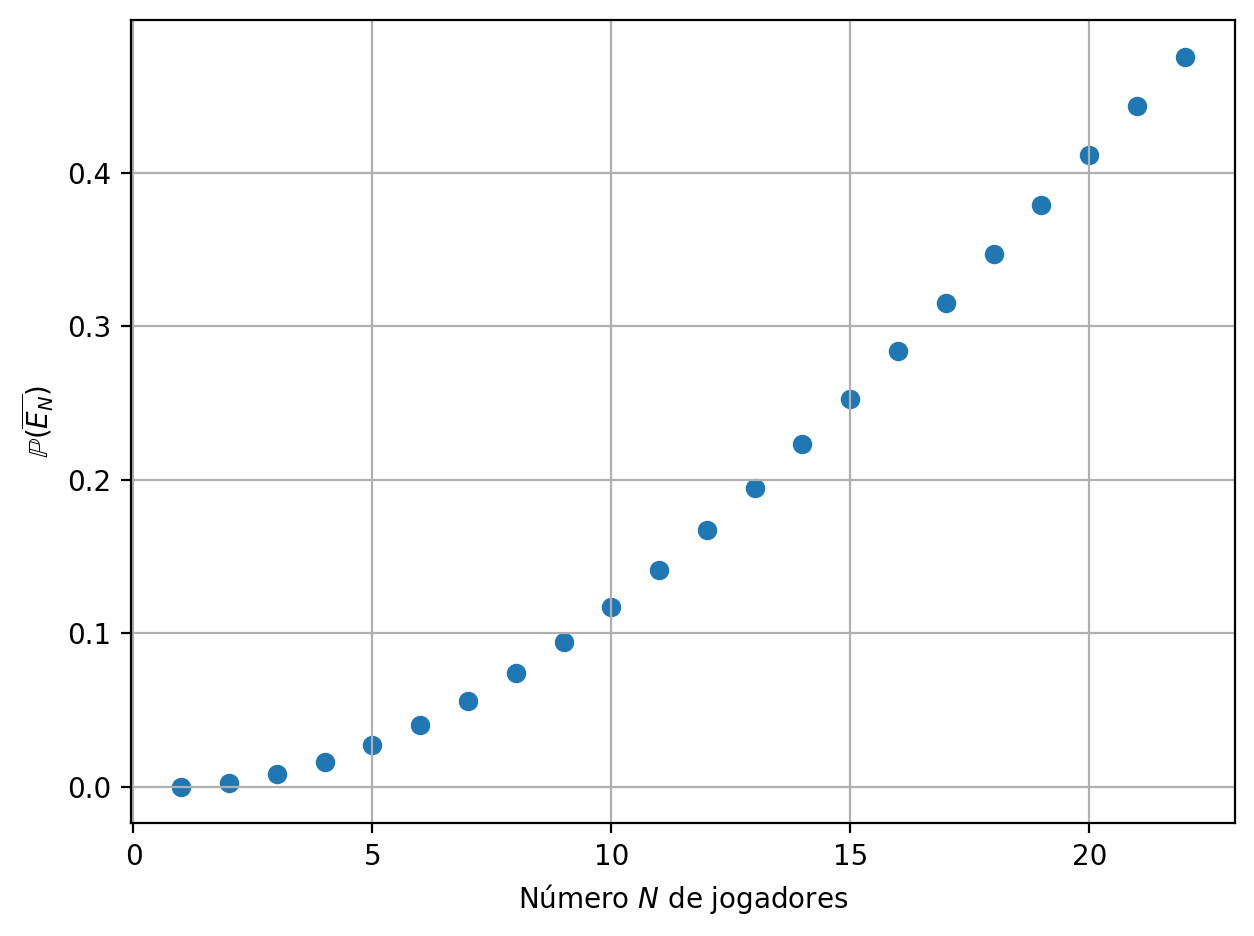

,Probabilidade
1,0.0
2,0.0027
3,0.0082
4,0.016
5,0.027
6,0.04
7,0.056
8,0.074
9,0.095
10,0.12


In [9]:
def same_birthday_prob(n, m):
    return 1 - factorial(n) * comb(m, n, exact=True) / m ** n

M = 365
N = 22
narr = np.arange(1, 23, dtype=np.int32)
probarr = np.array([same_birthday_prob(i, M) for i in range(1, N + 1)])

# Plot probabilities over n
fig, ax = plt.subplots()
ax.scatter(narr, probarr)

ax.set_xlabel(r'Número $N$ de jogadores')
ax.set_ylabel(r'$\mathbb{P}(\overline{E_N})$')
ax.grid()
fig.tight_layout()
plt.show()

# Print probabilities as a table
prob_df = pd.DataFrame(data=probarr, index=narr, columns=['Probabilidade'])
pd.options.display.float_format = '{:.2}'.format
display(prob_df)

## Questão 4

Seja $D_i$ o resultado após jogar o dado $i$. Nós vamos nos valer da hipótese de que cada lançamento dos dados é independente dos demais.

### a)

\begin{align*}
\mathbb{P}(D_1 \leq 3, D_2=5) &= \mathbb{P}(D_1 \leq 3)\mathbb{P}(D_2=5)\\
&= \frac{1}{2} \cdot \frac{1}{6}\\
&= \frac{1}{12}
\end{align*}

### b)

\begin{align*}
\mathbb{P}(D_1 + D_2 + D_3 = 16) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 + D_3 = 16 - i)\\
                                &= \sum_{i=1}^{6} \mathbb{P}(D_1=i | D_2 + D_3 = 16 - i)\mathbb{P}(D_2 + D_3 = 16 - i)\\
                                &= \sum_{i=1}^{6}  \sum_{i=j}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2=j,D_3 = 16 - i - j)\\
                                &= \sum_{i=1}^{6}  \sum_{i=j}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2=j|D_3 = 16 - i - j)\mathbb{P}(D_3 = 16 - i - j)\\
               &= \sum_{i=1}^{6}  \sum_{i=j}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2=j)\mathbb{P}(D_3 = 16 - i - j)\\
\end{align*}

Notamos também que esse desenvolvemento pode ser generalizado para outros valores da soma dos dados além de 16.

In [4]:
def dice_prob(val, n):
    if val < 1 or val > n:
        return 0.
    return 1. / n

def two_die_sum(total, n):
    prob = 0
    for i in range(1, n + 1):
        prob += dice_prob(i, n) * dice_prob(total - i, n)
    return prob

def three_die_sum(total, n):
    prob = 0
    for i in range(1, n + 1):
        prob += dice_prob(i, n) * two_die_sum(total - i, n)
    return prob

def pretty_print(prob, limit_denominator):
    f = Fraction(prob).limit_denominator(limit_denominator)
    num, denom = f.as_integer_ratio()
    return f'{num}/{denom}' if num > 0 else '0'


ndice = 6
total_arr = np.arange(1, 3 * ndice + 1)
two_die_sum_arr = [pretty_print(two_die_sum(i, ndice), ndice ** 2) for i in total_arr]
three_die_sum_arr = [pretty_print(three_die_sum(i, ndice), ndice ** 3) for i in total_arr]

data = np.stack((two_die_sum_arr, three_die_sum_arr), dtype=str, axis=-1)
columns = ['Soma de dois dados', 'Soma de três dados']
die_pd = pd.DataFrame(data, dtype=str, index=total_arr, columns=columns)
display(die_pd)

,Soma de dois dados,Soma de três dados
1,0,0
2,1/36,0
3,1/18,1/216
4,1/12,1/72
5,1/9,1/36
6,5/36,5/108
7,1/6,5/72
8,5/36,7/72
9,1/9,25/216
10,1/12,1/8


### c)

\begin{align*}
\mathbb{P}(D_1 + D_2 + D_3 = 16 | D_1 = 5) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 + D_3 = 16 - i | D_1 = 5)\\
&= \sum_{i=1}^{6} \mathbb{P}(D_1=i | D_1 = 5) \mathbb{P}(D_2 + D_3 = 16 - i | D_1 = 5)\\
&= \sum_{i=1}^{6} \delta_{i,5} \mathbb{P}(D_2 + D_3 = 16 - i)\\
&= \mathbb{P}(D_2 + D_3 = 11)\\
&= \sum_{j=1}^{6}\mathbb{P}(D_2 =j, D_3 = 11 - j)\\
&= \sum_{j=1}^{6}\mathbb{P}(D_2 =j) \mathbb{P}(D_3 = 11 - j)\\
&= \frac{1}{18},
\end{align*}

conforme a tabela acima.

### d)

É preciso diferenciar se queremos obter a probabilidade de se obter ao menos dois dados com o mesmo valor, ou exatamente dois dados com o mesmo valor. Nesse último caso, exclui-se a possibilidade de que o valor do terceiro dado também coincida. Vamos ver os dois casos.
A probabilidade que o lançamento de $D_1$ e de $D_2$ dê o mesmo resultado é

\begin{align*}
\mathbb{P}(D_1 = D_2) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 = i)\\
&= \sum_{i=1}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2 = i)\\
&= \sum_{i=1}^{6} \left(\frac{1}{6} \right)^2\\
&= 6 \left(\frac{1}{6} \right)^2\\
&= \frac{1}{6}\\
\end{align*}

Tem-se igualmente $\mathbb{P}(D_1 = D_3) = \mathbb{P}(D_2 = D_3) = \mathbb{P}(D_1 = D_2)$. Assim, 

$$\mathbb{P}(\text{ao menos dois dados com o mesmo valor}) = \mathbb{P}(D_1 = D_2 \cup D_1 = D_3 \cup D_2 = D_3)$$

Usamos o princípio de inclusão-exclusão:

\begin{align*}
\mathbb{P}(D_1 = D_2 \cup D_2 = D_3 \cup D_1 = D_3) =& \, \mathbb{P}(D_1 = D_2) + \mathbb{P}(D_1 = D_3) +\mathbb{P}(D_2 = D_3)\\
& - \mathbb{P}(D_1 = D_2, D_1 = D_3) - \mathbb{P}(D_1 = D_2, D_2 = D_3) - \mathbb{P}(D_1 = D_3, D_2 = D_3)\\ 
&+ \mathbb{P}(D_1 = D_2, D_1 = D_3, D_2 = D_3)\\
=& \, \mathbb{P}(D_1 = D_2) + \mathbb{P}(D_1 = D_3) +\mathbb{P}(D_2 = D_3)\\
&-3\mathbb{P}(D_1 = D_2 = D_3) +\mathbb{P}(D_1 = D_2 = D_3)\\
=&\, \mathbb{P}(D_1 = D_2) + \mathbb{P}(D_1 = D_3) +\mathbb{P}(D_2 = D_3) -2\mathbb{P}(D_1 = D_2 = D_3)\\
=&\, 3 \cdot \frac{1}{6} - 2 \cdot \frac{1}{36}\\
=&\, \frac{1}{2} -\frac{1}{18}\\
=&\, \frac{4}{9}\\
\end{align*}

Seria possível também calcular a probabilidade da proposição complementar,

\begin{align*}
\mathbb{P}(\text{nenhum dos dados possui o mesmo valor}) &= \mathbb{P}(D_1 \neq D_2 \neq D_3)\\
&= \sum_{i = 1}^6 \mathbb{P}(D_1 = i) \mathbb{P}(D_2 \neq D_3 \neq i)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i) \mathbb{P}(D_2 = j, D_2 \neq i, D_3 \neq i, D_3 \neq j)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i) \mathbb{P}(D_2 \neq i | D_2 = j)\mathbb{P}(D_2 = j) \mathbb{P} (D_3 \neq i, D_3 \neq j)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i)\mathbb{P}(D_2 = j) (1 - \delta_{i,j})\mathbb{P}(D_3 \neq i, D_3 \neq j)\\
&= \sum_{i = 1}^6 \sum_{j = 1}^6 \mathbb{P}(D_1 = i)\mathbb{P}(D_2 = j) (1 - \delta_{i,j})\mathbb{P}(D_3 \neq i, D_3 \neq j | i \neq j)\\
&= 2\sum_{i = 1}^6 \sum_{j > i}^6 \left(\frac{1}{6} \right)^2 \frac{4}{6}\\
&= 30 \cdot \frac{1}{36} \cdot \frac{4}{6}\\
&= \frac{5}{9},\\
\end{align*}

e portanto $\mathbb{P}(\overline{\text{nenhum dos dados possui o mesmo valor}}) = 4/9$.

Se incluirmos a restrição de que o valor de $D_3$ é diferente dos demais,

\begin{align*}
\mathbb{P}(D_1 = D_2 \neq D_3) &= \sum_{i=1}^{6} \mathbb{P}(D_1=i, D_2 = i, \overline{D_3 = i})\\
&= \sum_{i=1}^{6} \mathbb{P}(D_1=i)\mathbb{P}(D_2 = i)[1 - \mathbb{P}(D_3 = i)]\\
&= \sum_{i=1}^{6} \left(\frac{1}{6} \right)^2 \frac{5}{6}\\
&= 6 \left(\frac{1}{6} \right)^2 \frac{5}{6}\\
&= \frac{5}{36}\\
\end{align*}

Nesse caso, observa-se também que $(D_1 = D_2 \neq D_3) \cup (D_{\sigma(1)} = D_{\sigma(2)} \neq D_{\sigma(3)}) = 0$, onde $\sigma$ representa uma permutação cíclica. Essas duas proposições são exclusivas porque elas implicam $D_i \neq D_i$ para algum $i \in \{1, 2, 3 \}$, que possui probabilidade nula. Portanto,

\begin{align*}
\mathbb{P}(D_1 = D_2 \neq D_3 \cup D_1 = D_3 \neq D_2 \cup D_1 \neq D_2 = D_3) =& \, \mathbb{P}(D_1 = D_2 \neq D_3) + \mathbb{P}(D_1 = D_3 \neq D_2) +\mathbb{P}(D_1 \neq D_2 = D_3)\\
=&\, 3 \cdot \frac{5}{36}\\
=&\, \frac{5}{12}\\
\end{align*}

# Questões 6 e 7

Vamos carregar e visualizar os dados:

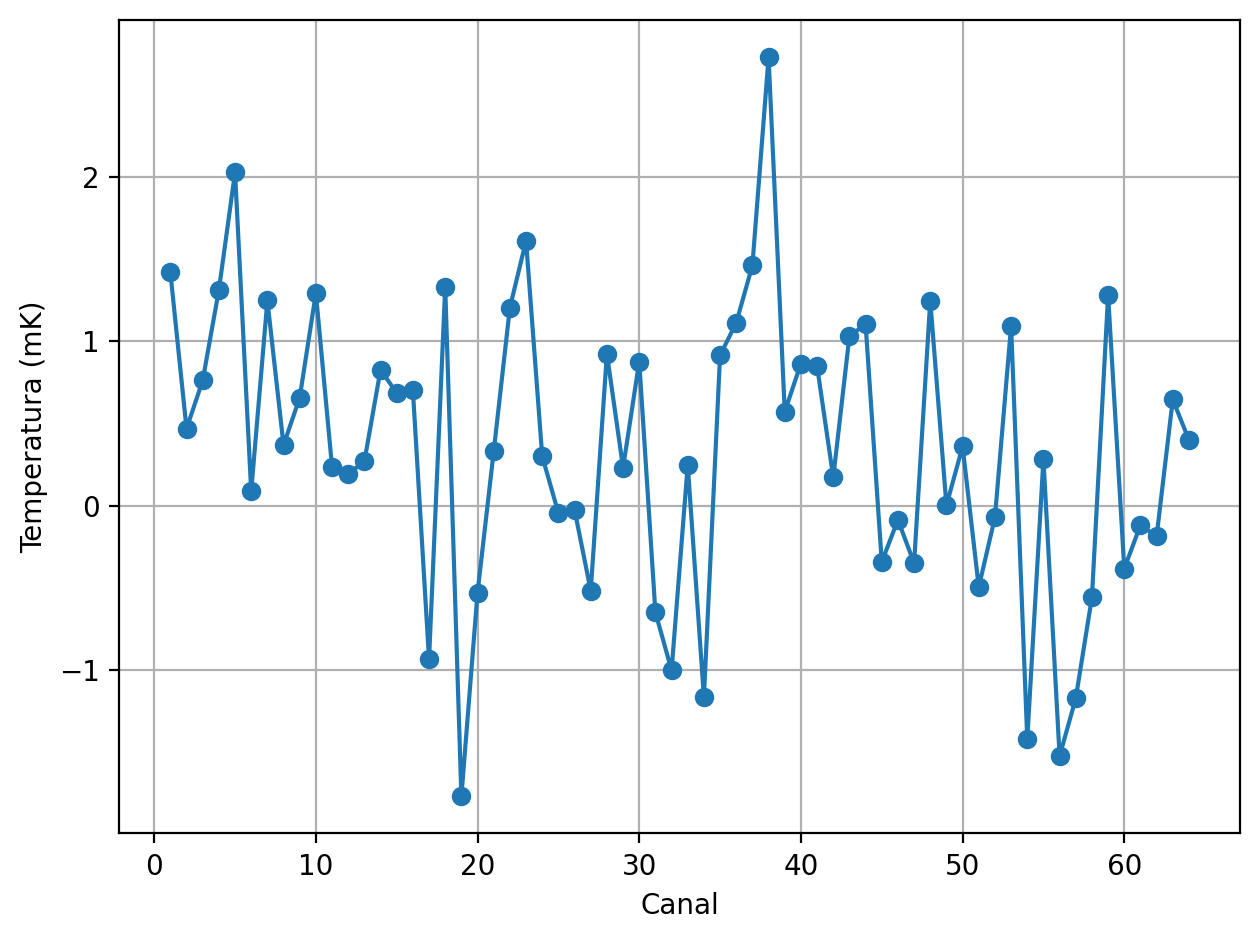

In [5]:
dtypes = {'Canal': np.int32, 'Temperatura': np.float64}
data = pd.read_csv('../data/pb1/gregory3p6.csv', header=None, index_col='Canal', names=dtypes.keys(), dtype=dtypes)
fig, ax = plt.subplots()
nchannels = data.shape[0]
channels = np.arange(1, nchannels + 1)
tmeasured = data['Temperatura']
ax.plot(channels, tmeasured, '-o')
ax.set_ylabel('Temperatura (mK)')
ax.set_xlabel('Canal')
ax.grid()
fig.tight_layout()
plt.show()

A a hipótese do modelo $M_1$ é que o sinal verdadeiro tem forma gaussiana e está centrado no canal $\nu = 24$. Escrevemos o sinal como

$$ s(\nu, T) = T \exp \left\{-\frac{1}{2} \left( \frac{\nu - \nu_0}{\sigma_L} \right)^2 \right\},$$

onde $T$ é a força do sinal e é um parâmetro livre da teoria e $\sigma_L = 2$.

Já o modelo alternativo $M_2$ diz que não há sinal, e as flutuações vistas nos dados são exclusivamente ruído. O ruído em ambos os casos é distribuído normalmente com uma variância $\sigma_K^2 = 1 \, \text{mK}^2$.

In [6]:
sigmal = 2.
sigmak = 1.
npoints = 1000
Tmin, Tmax = 0.1, 100
logTmin, logTmax = -1, 2

def signal(nu, nutrue, T):
    return T * np.exp(-0.5 * (nu - nutrue) ** 2 / sigmal ** 2)

def single_like(nu, d, nutrue, T):
    true = signal(nu, nutrue, T)
    return gaussian(true, d, sigmak)

Tarr = np.logspace(logTmin, logTmax, npoints)

# Signal posterior
nutrue = 37

# Different priors
loglike_signal = 0.
loglike_no_signal = 0.
for channel, d in zip(channels, tmeasured):
    s = signal(channel, nutrue, Tarr)
    loglike_signal += loggaussian(s, d, sigmak)
    loglike_no_signal += loggaussian(0., d, sigmak)

logposterior_uniform = loglike_signal + np.log(uniform_prior(Tarr, Tmin, Tmax))
logposterior_jeffreys = loglike_signal + np.log(jeffreys_prior(Tarr, Tmin, Tmax))
posterior_uniform = safe_exp(logposterior_uniform)
posterior_jeffreys = safe_exp(logposterior_jeffreys)
evidence_uniform = np.trapz(posterior_uniform, Tarr)
evidence_jeffreys = np.trapz(posterior_jeffreys, Tarr)
evidence_no_signal = np.exp(loglike_no_signal)

# Evidences
print(f'Evidence with uniform prior: {evidence_uniform:.3e}')
print(f'Evidence with Jeffreys prior: {evidence_jeffreys:.3e}')
print(f'Evidence for model M2: {evidence_no_signal:.3e}')

# Odds ratios
uniform_odds_ratio = np.exp(np.log(evidence_uniform) - loglike_no_signal)
jeffreys_odds_ratio = np.exp(np.log(evidence_jeffreys) - loglike_no_signal)
print(f'Uniform odds ratio: {uniform_odds_ratio:.3f}')
print(f'Jeffreys odds ratio: {jeffreys_odds_ratio:.3f}')

Evidence with uniform prior: 1.675e-38
Evidence with Jeffreys prior: 1.729e-37
Evidence for model M2: 1.133e-38
Uniform odds ratio: 1.478
Jeffreys odds ratio: 15.263


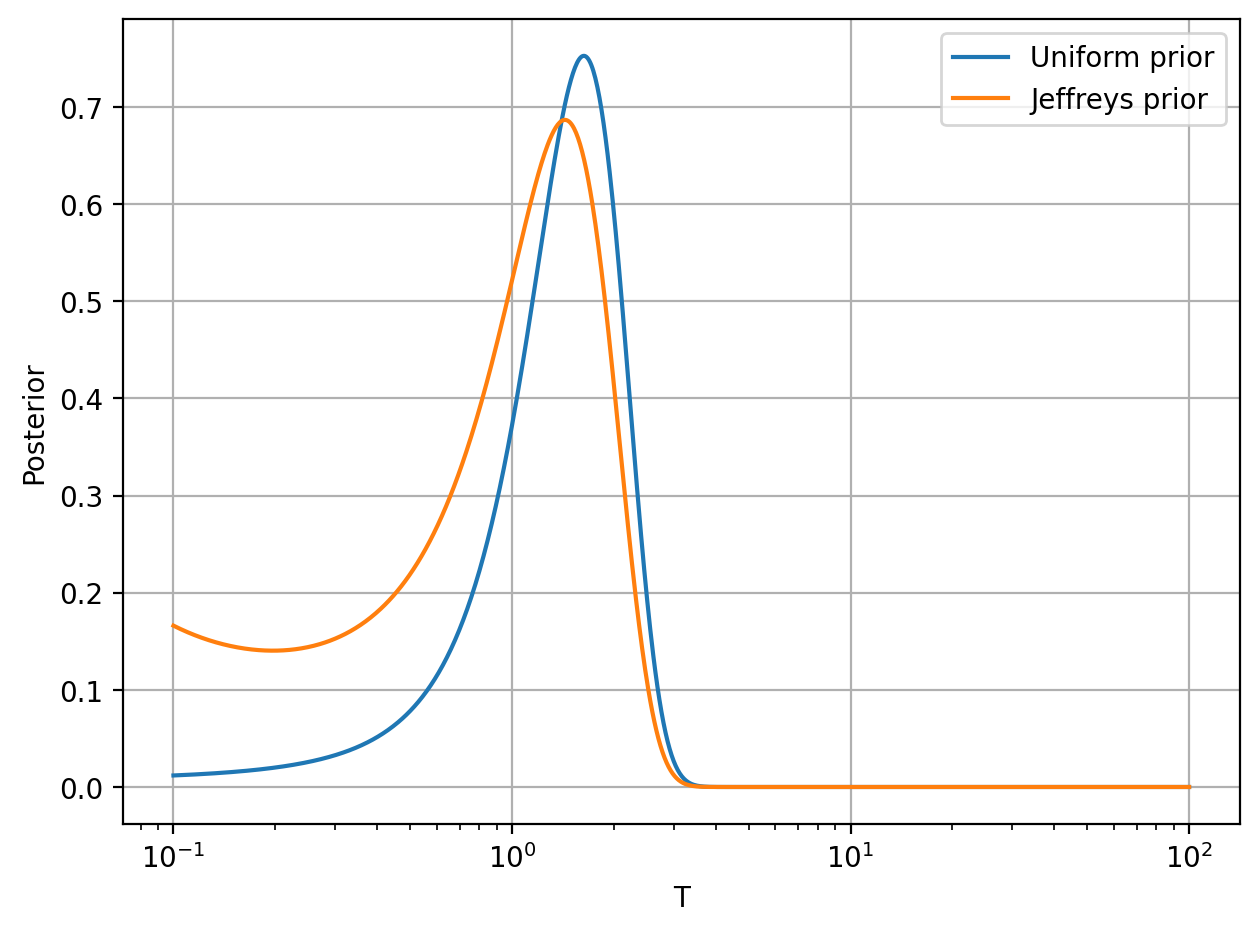

In [7]:
# Plotting posteriors for each prior
posterior_uniform = normalize(posterior_uniform, Tarr)
posterior_jeffreys = normalize(posterior_jeffreys, Tarr)
fig, ax = plt.subplots()
ax.plot(Tarr, posterior_uniform, label='Uniform prior')
ax.plot(Tarr, posterior_jeffreys, label='Jeffreys prior')
ax.set_xscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.grid()
ax.legend()
fig.tight_layout()

plt.show()

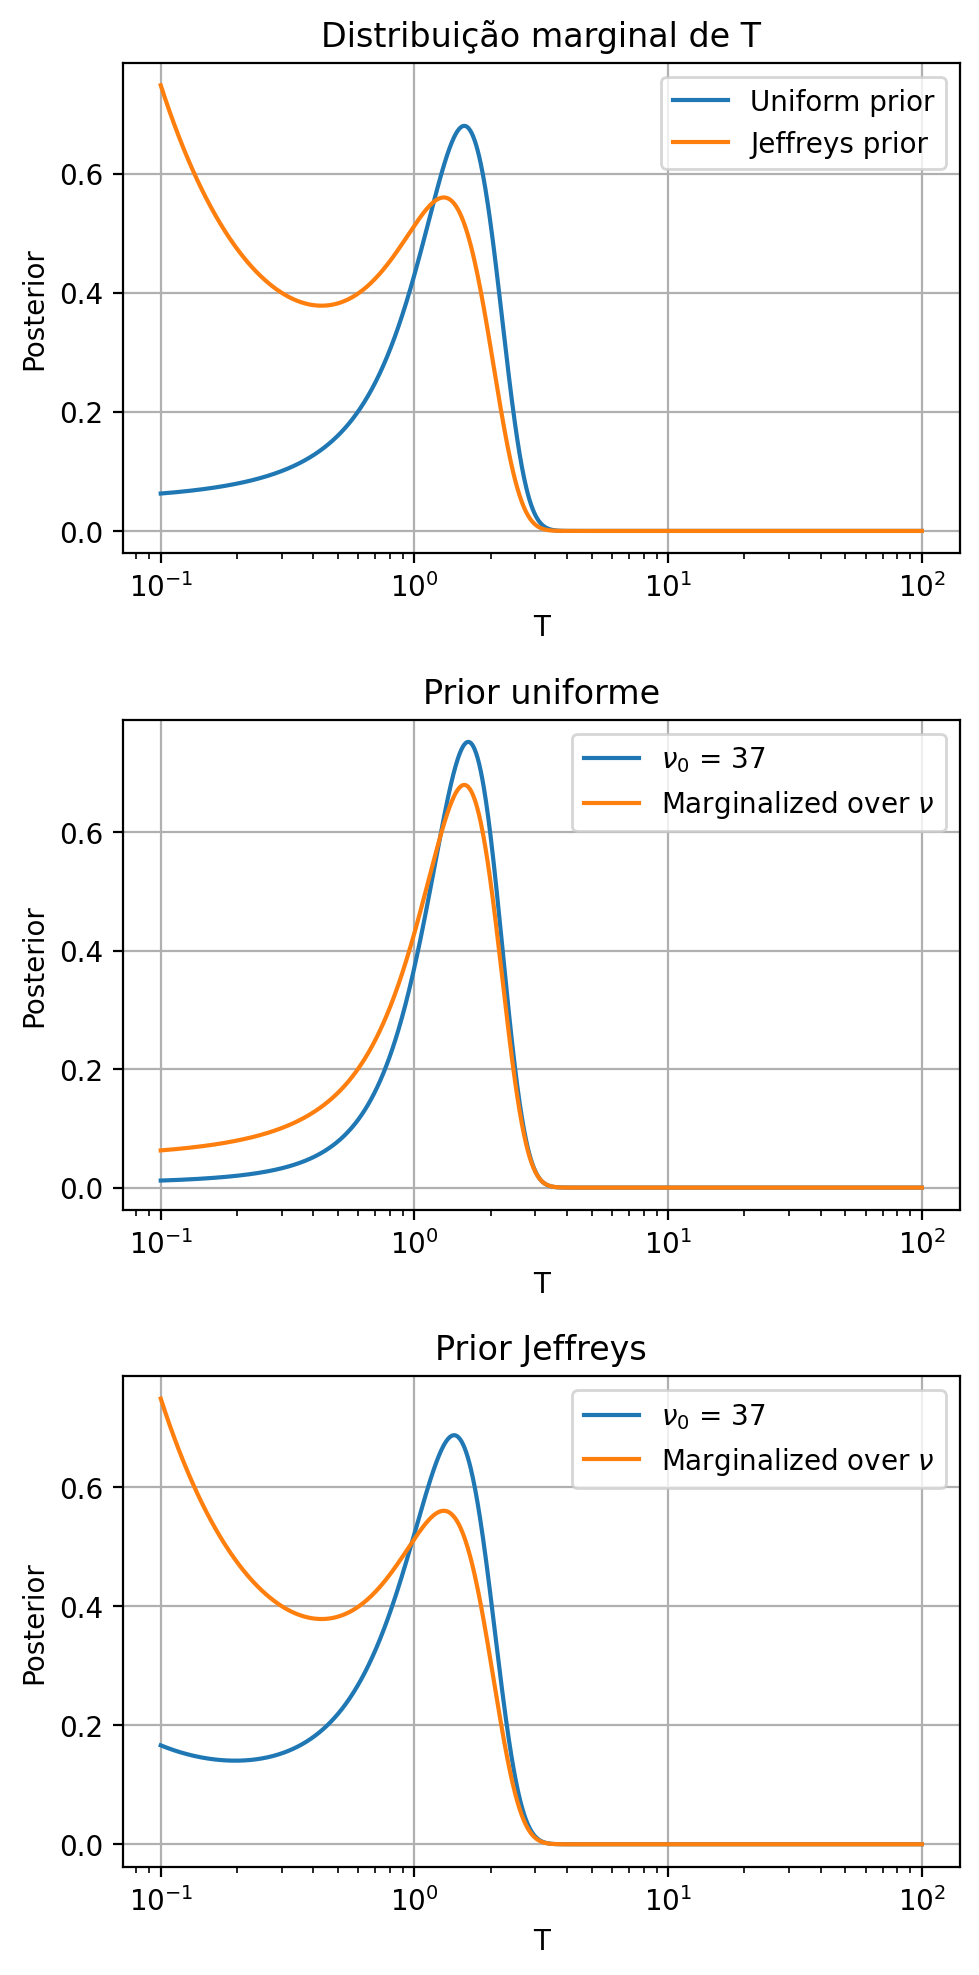

In [8]:
numin, numax = 1, 50
nuarr = np.linspace(numin, numax, npoints)
numesh, Tmesh = np.meshgrid(nuarr, Tarr)

# Different priors
loglike_signal = 0.
for channel, d in zip(channels, tmeasured):
    s = signal(channel, numesh, Tmesh)
    loglike_signal += loggaussian(s, d, sigmak)

lognu_prior = np.log(uniform_prior(numesh, numin, numax))
log2dim_posterior_uniform = loglike_signal + np.log(uniform_prior(Tmesh, Tmin, Tmax)) + lognu_prior
log2dim_posterior_jeffreys = loglike_signal + np.log(jeffreys_prior(Tmesh, Tmin, Tmax)) +  lognu_prior
twodim_posterior_uniform = safe_exp(log2dim_posterior_uniform)
twodim_posterior_jeffreys = safe_exp(log2dim_posterior_jeffreys)

marginalized_uniform = normalize(np.trapz(twodim_posterior_uniform, nuarr, axis=-1), Tarr)
marginalized_jeffreys = normalize(np.trapz(twodim_posterior_jeffreys, nuarr, axis=-1), Tarr)

# Plotting posteriors for each prior
fig, axs = plt.subplots(3, 1, figsize=(5, 10))
ax = axs[0]
ax.plot(Tarr, marginalized_uniform, label='Uniform prior')
ax.plot(Tarr, marginalized_jeffreys, label='Jeffreys prior')
ax.set_xscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.set_title('Distribuição marginal de T')
ax.grid()
ax.legend()
fig.tight_layout()

# Comparing marginalized x fixed nu0 for uniform prior
ax = axs[1]
ax.plot(Tarr, posterior_uniform, label=r'$\nu_0$ = {}'.format(nutrue))
ax.plot(Tarr, marginalized_uniform, label=r'Marginalized over $\nu$')
ax.set_xscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.set_title('Prior uniforme')
ax.grid()
ax.legend()
fig.tight_layout()

# Comparing marginalized x fixed nu0 for Jeffreys prior
ax = axs[-1]
ax.plot(Tarr, posterior_jeffreys, label=r'$\nu_0$ = {}'.format(nutrue))
ax.plot(Tarr, marginalized_jeffreys, label=r'Marginalized over $\nu$')
ax.set_xscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Posterior')
ax.set_title('Prior Jeffreys')
ax.grid()
ax.legend()
fig.tight_layout()

plt.show()